## P6.6.1
----

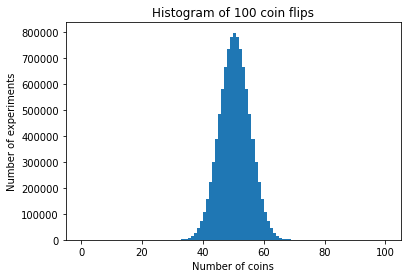

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_trials = 10_000_000
num_coins = 100

experiments = np.random.binomial(num_coins, 0.5, num_trials)

plt.hist(experiments, bins=num_coins, range=(0, num_coins))
plt.title("Histogram of 100 coin flips")
plt.xlabel("Number of coins")
plt.ylabel("Number of experiments")
plt.show()


## P6.6.2
----

In [12]:
import numpy as np

d, l = 1, 1

num_trials = 10_000_000

x = d/2.0 * np.random.rand(num_trials)
theta = np.pi / 2.0 * np.random.random_sample(num_trials)

p = np.sum(x <= l/2.0 * np.sin(theta)) / num_trials

print(f"The Monte Carlo estimate of p is {p:.4f}")
print(f"The true value of p is {2*l/np.pi/d:.4f}")


The Monte Carlo estimate of p is 0.6365
The true value of p is 0.6366


## P6.6.3
----

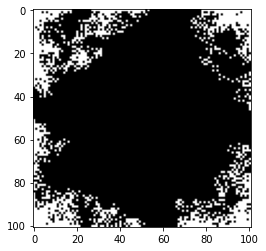

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
world = np.zeros((n + 1, n + 1))

d = 0.02
NUM_BACTERIA, NUM_STEPS = 10, 400

c_x, c_y = 0.5, 0.5

P0, P1 = 0.7, 1.0


def tumble(d: float) -> float:
    """
    Randomly pick a new direction, (dx, dy) for the bacterium.
    """
    theta = 2 * np.pi * np.random.rand()
    return d * np.cos(theta), d * np.sin(theta)


def food_potential(x: float, y: float) -> float:
    """
    Compute the food potential for a given location.
    """
    return -np.hypot((x - c_x), (y - c_y))


for bacteria in range(NUM_BACTERIA):
    phi = 2 * np.pi * bacteria / NUM_BACTERIA
    x, y = c_x + np.cos(phi) / 2, c_y + np.sin(phi) / 2
    dx, dy = tumble(d)
    for step in range(NUM_STEPS):
        grad = -food_potential(x, y)

        x, y = max(min(x + dx, 1), 0), max(min(y + dy, 1), 0)

        ix, iy = int(x * n), int(y * n)
        world[ix, iy] = 1

        grad += food_potential(x, y)

        if grad > 0:
            probability = P1
        else:
            probability = P0
        if np.random.rand() < probability:
            dx, dy = tumble(d)
plt.imshow(world, cmap="gray")
plt.show()


## P6.6.4
----

100%|██████████| 1000000/1000000 [04:58<00:00, 3353.92it/s]


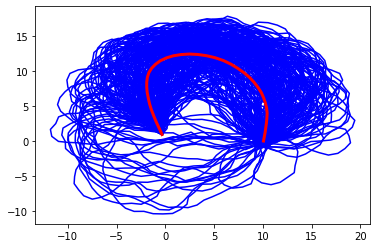

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

b = 10
phi_0 = np.radians(110)
sigma = np.radians(17)
n = 40
num_trials = 1_000_000
av = np.zeros((n, 2))
num_good = 0   
for trial in tqdm(range(num_trials)):
    phi = phi_0
    position = np.zeros((n, 2))
    for i in range(n):
        dx, dy = np.cos(phi), np.sin(phi)
        position[i] = position[i-1] + (dx, dy)
        phi += sigma * np.random.randn()
    
    if np.hypot(b-position[-1,0], position[-1,1]) < 1.0:
        plt.plot(position[:,0], position[:,1], color='b')
        av += position
        num_good += 1
av /= num_good
plt.plot(av[:,0], av[:,1], lw=3, color='r')

plt.show()
